1. scikit-learn을 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요

In [1]:
import sklearn as sk

2. pandas를 별칭(alias) pd로 임포트하는 코드를 작성하고 실행하세요

In [2]:
import pandas as pd

3. pandas 함수로 데이터 파일을 읽어 dataframe 변수(변수명 df)에 할당하는 코드 작성하세요.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/KT aivleschool/KT_aivle_school_AI_track/15. MINI_PJ5/2일차/'
df = pd.read_csv(path + 'nav_data.csv', encoding='cp949')

In [5]:
df.tail()

,Time_Departure,Time_Arrival,Distance,Time_Driving,Speed_Per_Hour,Address1,Address2,Signaltype,Weekday,Hour,Day
55526,57:07.0,06:15.7,4448,544.301025,29.419015,경기도,파주시,22,4,23,24
55527,57:26.0,07:15.3,3106,535.666992,20.874163,서울특별시,구로구,16,4,23,24
55528,57:46.0,07:56.8,10325,610.799988,60.854618,서울특별시,광진구,5,4,23,24
55529,58:03.0,12:42.4,4458,878.479004,18.268849,서울특별시,구로구,32,4,23,24
55530,58:56.0,08:10.4,3780,553.580994,24.581769,서울특별시,강남구,18,4,23,24


4. 실주행시간과 평균시속의 분포를 같이 확인하려고 함니다. Time_Driving(실주행시간)과 Spped_Per_Hour(평균시속)을 jointplot 그래프로 만드세요.

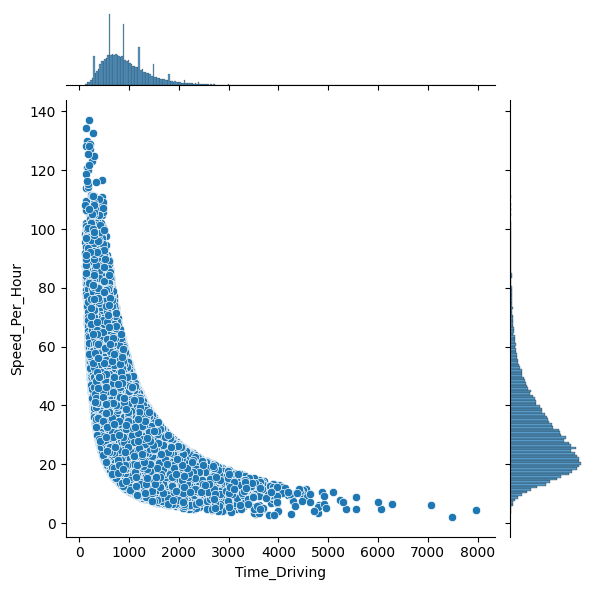

In [6]:
import seaborn as sns

# jointplot 그래프 생성
sns.jointplot(x='Time_Driving', y='Speed_Per_Hour', data=df)

5. 데이터 간 상관계수를 구하여 heatmap 그래프로 시각화해보세요. (annotation 포함)

<Axes: >

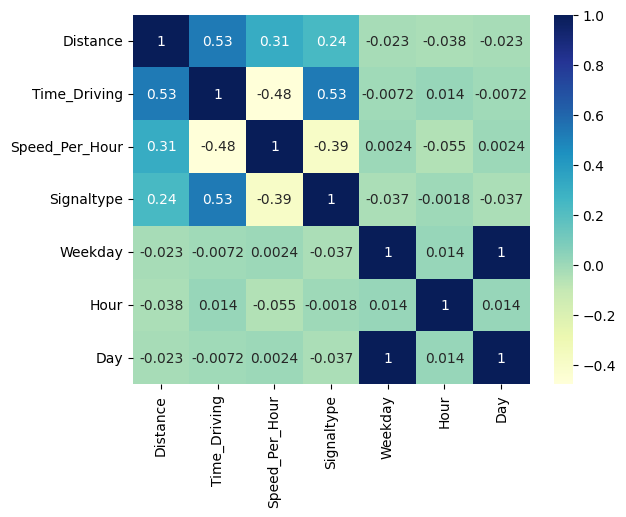

In [7]:
# 상관계수 행렬 생성
corr_matrix = df.corr()

# heatmap 그래프 생성
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')


 6. 불필요한 데이터를 삭제 처리하세요. ('Time_Departure' 컬럼을 삭제하세요. 처리 결과를 df_temp 데이터 프레임에 저장하세요)



In [8]:
# 'Time_Departure' 컬럼 삭제
df_temp = df.drop(['Time_Departure', 'Time_Arrival'], axis=1)

# 결과 출력
print(df_temp)

       Distance  Time_Driving  Speed_Per_Hour Address1 Address2  Signaltype  \
0         12914   1201.534058       38.692536      경기도      광명시           7   
1          7483    823.817017       32.699980    서울특별시     영등포구          31   
2          8087    526.710998       55.273575      경기도      김포시           6   
3         10528    898.581970       42.178456      경기도      광주시           2   
4         10636    957.758972       39.978326      경기도  안산시 상록구          28   
...         ...           ...             ...      ...      ...         ...   
55526      4448    544.301025       29.419015      경기도      파주시          22   
55527      3106    535.666992       20.874163    서울특별시      구로구          16   
55528     10325    610.799988       60.854618    서울특별시      광진구           5   
55529      4458    878.479004       18.268849    서울특별시      구로구          32   
55530      3780    553.580994       24.581769    서울특별시      강남구          18   

       Weekday  Hour  Day  
0            0     5   

7. Scikit-learn의 encoder을 사용하여 범주형 데이터를 수치형 데이터로 변환하세요 (대상 컬럼: 주소 컬럼, fit_transform 활용)

In [9]:
from sklearn.preprocessing import LabelEncoder

# 'Address' 컬럼 추출
address1 = df_temp['Address1']
address2 = df_temp['Address2']

# LabelEncoder 객체 생성 후 fit_transform() 함수로 변환
encoder = LabelEncoder()
df_temp['Address1'] = encoder.fit_transform(address1)
df_temp['Address2'] = encoder.fit_transform(address2)

# 결과 출력
print(df_temp['Address1'])
print(df_temp['Address2'])


0        2
1        3
2        2
3        2
4        2
        ..
55526    2
55527    3
55528    3
55529    3
55530    3
Name: Address1, Length: 55531, dtype: int64
0        12
1        57
2        19
3        13
4        47
         ..
55526    72
55527    15
55528    14
55529    15
55530     2
Name: Address2, Length: 55531, dtype: int64


In [10]:
df_temp.tail()

,Distance,Time_Driving,Speed_Per_Hour,Address1,Address2,Signaltype,Weekday,Hour,Day
55526,4448,544.301025,29.419015,2,72,22,4,23,24
55527,3106,535.666992,20.874163,3,15,16,4,23,24
55528,10325,610.799988,60.854618,3,14,5,4,23,24
55529,4458,878.479004,18.268849,3,15,32,4,23,24
55530,3780,553.580994,24.581769,3,2,18,4,23,24


8. 원-핫 인코딩으로 컬럼 데이터를 1과 0의 이진형 벡터로 변환하세요. (대상 컬럼: weekday, hour, day, address1, address2, get_dummies 활용, drop_first는 'True' 파라미터 추가)


In [11]:
# 범주형 변수들 추출
categorical_columns = ['Weekday', 'Hour', 'Day', 'Address1', 'Address2']

# get_dummies() 함수로 원-핫 인코딩
df_one_hot = pd.get_dummies(df_temp, columns=categorical_columns, drop_first=True)

# 결과 출력
print(df_one_hot)

       Distance  Time_Driving  Speed_Per_Hour  Signaltype  Weekday_1  \
0         12914   1201.534058       38.692536           7          0   
1          7483    823.817017       32.699980          31          0   
2          8087    526.710998       55.273575           6          0   
3         10528    898.581970       42.178456           2          0   
4         10636    957.758972       39.978326          28          0   
...         ...           ...             ...         ...        ...   
55526      4448    544.301025       29.419015          22          0   
55527      3106    535.666992       20.874163          16          0   
55528     10325    610.799988       60.854618           5          0   
55529      4458    878.479004       18.268849          32          0   
55530      3780    553.580994       24.581769          18          0   

       Weekday_2  Weekday_3  Weekday_4  Hour_1  Hour_2  ...  Address2_68  \
0              0          0          0       0       0  ...

9. 훈련과 검증 각각에 사용할 데이터셋 분리하세요. (y: Time_Driving, Scikit-learn의 train_test_split 함수 활용하여 7:3으로 분리)

In [12]:
from sklearn.model_selection import train_test_split

# X, y 데이터 분리
x = df_one_hot.drop('Time_Driving', axis=1)
y = df_one_hot['Time_Driving']

# 훈련/검증 데이터 분리 (7:3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


10. StandarScaler를 사용하여 데이터 변수를 훈련데이터셋은 정규분포화(fit_transform), 검증 데이터셋은 표준화(transform)하세요.

In [13]:
print(x_train.shape) 
print(x_test.shape) 


(38871, 117)
(16660, 117)


In [14]:
from sklearn.preprocessing import StandardScaler

# StandarScaler 객체 생성
scaler = StandardScaler()

# 훈련 데이터셋에 대한 스케일링 수행 (fit_transform)
x_train_scaled = scaler.fit_transform(x_train)

# 검증 데이터셋에 대한 스케일링 수행 (transform)
x_test_scaled = scaler.transform(x_test)


11. Time_Driving(실주행시간) 컬럼을 Label(y)로, 나머지 컬럼을 Feature(x)로 할당한 후, max_depth 5로 decision tree로 머신러닝 모델을 만들고 학습을 진행하세요. 

In [15]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=10, random_state=42)
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

12. 머신러닝 모델에 대해 RMSE, R-squared 값 출력, scatter plot을 이용하여 x축에 실제 y값 및 y축에 예측값 시각화 

RMSE(train): 23.179
RMSE(test): 45.959
R-squared(train): 0.998
R-squared(test): 0.992


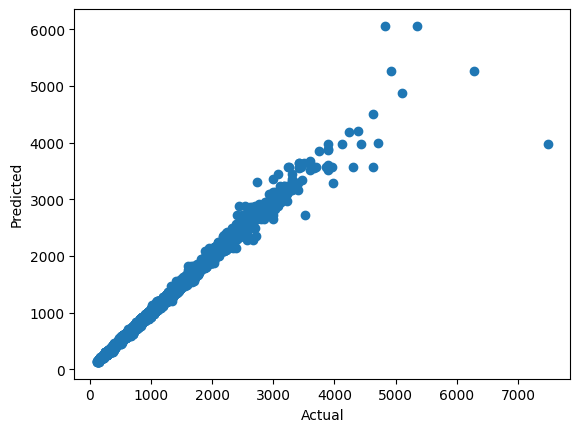

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 모델 예측
y_pred_train = model.predict(x_train_scaled)
y_pred_test = model.predict(x_test_scaled)

# RMSE 계산
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("RMSE(train): {:.3f}".format(rmse_train))
print("RMSE(test): {:.3f}".format(rmse_test))

# R-squared 계산
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("R-squared(train): {:.3f}".format(r2_train))
print("R-squared(test): {:.3f}".format(r2_test))

# scatter plot 시각화
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


13. 딥러닝 모델을 만드세요. (EarlyStopping 콜백 적용, ModelCheckPoint 콜백 적용하여 validation performance가 좋은 모델을 best_model.h5 파일로 저장)

In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=x_train_scaled.shape[1:]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

In [19]:
model.compile(loss='mae', optimizer='adam', metrics=['mse'] )

In [20]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)

In [21]:
history = model.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_test_scaled, y_test),
                    callbacks=[early_stopping_cb, model_checkpoint_cb])


Epoch 1/100
1215/1215 [==============================] - 4s 3ms/step - loss: 303.6785 - mse: 260689.5156 - val_loss: 116.7825 - val_mse: 46860.8008
Epoch 2/100
1215/1215 [==============================] - 3s 2ms/step - loss: 97.7810 - mse: 34804.5938 - val_loss: 83.4199 - val_mse: 27480.5176
Epoch 3/100
1215/1215 [==============================] - 4s 3ms/step - loss: 76.3876 - mse: 25090.1035 - val_loss: 69.7854 - val_mse: 20158.5547
Epoch 4/100
1215/1215 [==============================] - 4s 3ms/step - loss: 65.3704 - mse: 24905.8340 - val_loss: 61.4565 - val_mse: 17041.7871
Epoch 5/100
1215/1215 [==============================] - 3s 2ms/step - loss: 57.2118 - mse: 23683.6934 - val_loss: 51.9495 - val_mse: 14285.7520
Epoch 6/100
1215/1215 [==============================] - 3s 2ms/step - loss: 42.5905 - mse: 17991.1562 - val_loss: 34.3560 - val_mse: 10780.5840
Epoch 7/100
1215/1215 [==============================] - 3s 3ms/step - loss: 30.6426 - mse: 13272.8438 - val_loss: 26.8095 - va

In [22]:
# model = keras.models.load_model("best_model.h5")

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_test_pred = model.predict(x_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)
print("RMSE:", rmse)
print("R-squared:", r2)

521/521 [==============================] - 1s 1ms/step
RMSE: 47.96120039684071
R-squared: 0.9913127401487085


14. 딥러닝 모델 훈련데이터셋의 mae와 검증데이터셋의 val_mae를 1개의 그래프에 표시하세요. (mae, val_mae 범례를 표시하고, 그래프의 타이틀은 Training mae로 표시, x축에는 Epochs라고 표시, Y축에는 mae라고 표시)

In [24]:
# import matplotlib.pyplot as plt

# # 훈련데이터셋과 검증데이터셋의 mae 값과 val_mae 값을 변수에 저장
# mae = history.history['mae']
# val_mae = history.history['val_mae']

# # x축은 epochs, y축은 mae, val_mae 값을 각각 표시
# epochs = range(1, len(mae) + 1)
# plt.plot(epochs, mae, 'bo', label='Training mae')
# plt.plot(epochs, val_mae, 'b', label='Validation mae')
# plt.title('Training mae')
# plt.xlabel('Epochs')
# plt.ylabel('mae')
# plt.legend()
# plt.show()


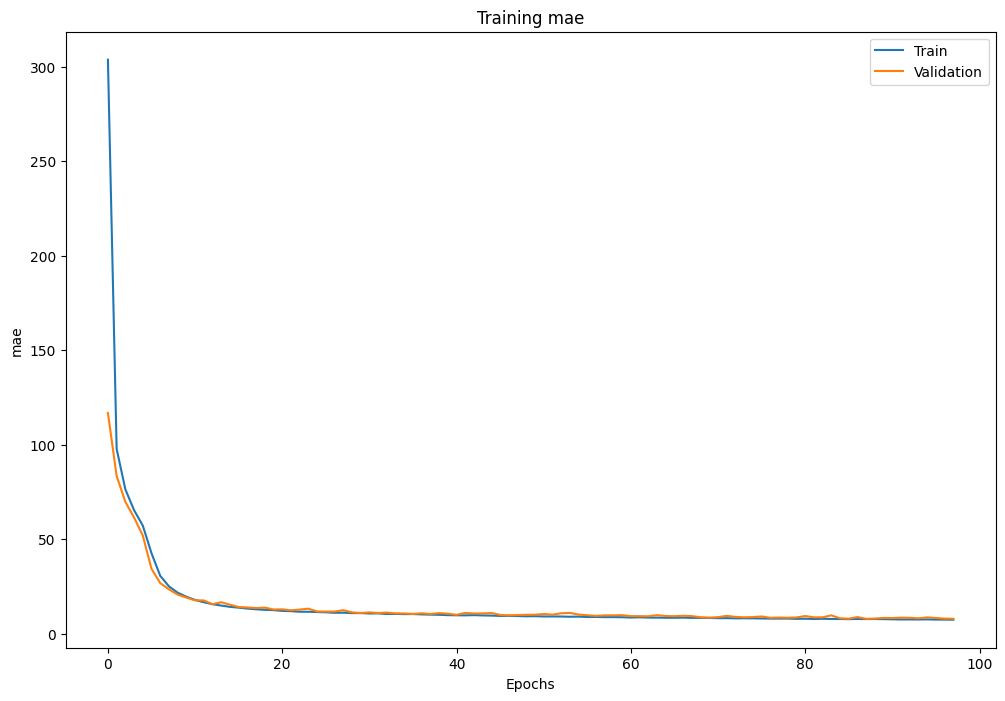

In [25]:
if not isinstance(history, dict):
    history = history.history

plt.figure(figsize = (12, 8))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Training mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend(['Train', 'Validation'])
plt.show()